# Regression template

This follows https://auto.gluon.ai/stable/tutorials/tabular/tabular-quick-start.html

Work through the notebook cells and change to make it work for your project


### Imports

In [9]:
# !pip install pandas numpy autogluon ipywidgets git+https://github.com/Ramprasad-Group/psmiles.git

import pandas as pd
import numpy as np
from psmiles import PolymerSmiles as PS
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularPredictor

### Data and fingerprint

- Create another notebook "data.ipynb". Synthesize, modify, manipulate, and save your data as pandas dataframe in this notebook. Finally, save your data using `pd.to_csv('data.csv)',
- Replace the following code and load your own data

In [10]:
df_init = pd.read_json(
    "https://raw.githubusercontent.com/kuennethgroup/materials_datasets/refs/heads/main/polymer_tendency_to_crystalize/polymers_tend_to_crystalize.json"
)[["smiles", "value"]]

# Compute the fingerprints using the PSMILES package
fps = np.vstack(df_init.smiles.apply(lambda x: PS(x).fingerprint()))

### Scale the fingerprints

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler_fps = MinMaxScaler()
fps_scaled = scaler_fps.fit_transform(fps)
fps_scaled = pd.DataFrame(fps_scaled)

### Prepare final data frame

In [12]:
# Concat fingerprints
df = pd.concat((fps_scaled, df_init), axis=1)

# drop smiles column because it should not be used for training
df = df.drop(columns="smiles")

# Make sure they're all float
df = df.astype(np.float32)


# Remove columns that are zero, if any
df = df.loc[:, (df != 0).any(axis=0)]

# Normalize the tendency to crystalize
# df['value'] = df['value'] / 100

scaler_value = MinMaxScaler()
df["value"] = scaler_value.fit_transform(df[["value"]])
df

,0,1,2,4,5,6,7,8,9,11,...,2035,2036,2038,2039,2041,2043,2044,2045,2047,value
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.483077
1,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.449331
2,1.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.343636
3,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.201459
4,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.321342
428,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.257904
429,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.293068
430,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.218991


### Split in train and test 

In [13]:
df_train, df_test = train_test_split(df, test_size=0.20, random_state=42)

display(df_train)
display(df_test)

,0,1,2,4,5,6,7,8,9,11,...,2035,2036,2038,2039,2041,2043,2044,2045,2047,value
132,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.582590
231,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.286178
31,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217673
84,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.809282
296,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.300365
106,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.212606
270,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.088873
348,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.125253


,0,1,2,4,5,6,7,8,9,11,...,2035,2036,2038,2039,2041,2043,2044,2045,2047,value
424,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083604
75,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.733685
180,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.5,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.536279
30,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.168221
392,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.385083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.635488
124,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.894406
24,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.126752
17,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.373835


### Train you AutoGluon ML model

In [14]:
predictor = TabularPredictor(
    label="value",
    problem_type="regression",
).fit(df_train, time_limit=60, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20250624_143411"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.8
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #140-Ubuntu SMP Wed Dec 18 17:59:53 UTC 2024
CPU Count:          192
Memory Avail:       963.23 GB / 1007.45 GB (95.6%)
Disk Space Avail:   1574.14 GB / 7096.34 GB (22.2%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be f

### Use matplotlib for plotting

In [15]:
from sklearn.metrics import r2_score, root_mean_squared_error

y_pred = predictor.predict(df_test.drop(columns=["value"]))

r2 = r2_score(df_test["value"], y_pred)
rmse = root_mean_squared_error(df_test["value"], y_pred)

print(f"R2: {r2}")
print(f"RMSE: {rmse}")

/home/chris/courses/ml-in-ms-st25/.venv/lib/python3.12/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/home/chris/courses/ml-in-ms-st25/.venv/lib/python3.12/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute ma

R2: 0.452353835105896
RMSE: 0.1850890815258026


/home/chris/courses/ml-in-ms-st25/.venv/lib/python3.12/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/home/chris/courses/ml-in-ms-st25/.venv/lib/python3.12/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute ma

Text(0.5, 0, 'pred')

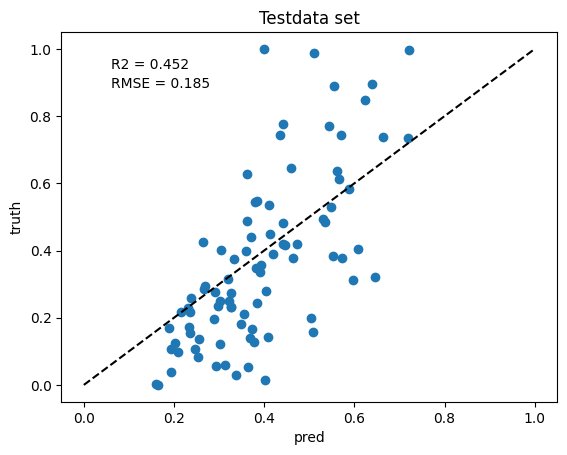

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

y_pred = predictor.predict(df_test.drop(columns=["value"]))
y_pred

ax.plot(y_pred, df_test["value"], "o")
ax.plot([0, 1], [0, 1], "k--")
ax.text(0.1, 0.9, f"R2 = {r2:.3f}", transform=ax.transAxes)
ax.text(0.1, 0.85, f"RMSE = {rmse:.3f}", transform=ax.transAxes)
ax.set_title("Testdata set")
ax.set_ylabel("truth")
ax.set_xlabel("pred")